Article Link: https://realpython.com/pandas-plot-python/?utm_source=pocket_mylist

In [1]:
import pandas as pd

In [2]:
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"
df = pd.read_csv(download_url)
type(df)

pandas.core.frame.DataFrame

A few Tutorial Links on Pandas and Dataframes to check out: <br>
    https://realpython.com/pandas-python-explore-dataset/ <br>
    https://realpython.com/pandas-dataframe/

In [3]:
# to make sure pandas doesn't hide any column
pd.set_option("display.max.columns", None)

df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


<b>Median</b>, in statistics, is the middle value of the given list of data, when arranged in an order. The arrangement of data or observations can be done either in ascending order or descending order. Example: The median of 2,3,4 is 3. In Maths, the median is also a type of average, which is used to find the center value.

If all you are interested in is where you stand compared to the rest of the herd, you need a statistic that reports <b>relative standing</b>, and that statistic is called a <b>percentile</b>. The <b>kth percentile</b> is a value in a data set that splits the data into two pieces: The lower piece contains k percent of the data, and the upper piece contains the rest of the data (which amounts to [100 – k] percent, because the total amount of data is 100 percent). 
Note: k is any number between 0 and 100.

The median is the 50th percentile: the point in the data where 50 percent of the data fall below that point, and 50 percent fall above it.

Your dataset contains some columns related to the earnings of graduates in each major: <br>

    "Median" is the median earnings of full-time, year-round workers.
    "P25th" is the 25th percentile of earnings.
    "P75th" is the 75th percentile of earnings.
    "Rank" is the major’s rank by median earnings.

Any command with % is the <b> magic command </b> <br>
The <b>%matplotlib</b> magic command sets up your Jupyter Notebook for displaying plots with Matplotlib. <br>
The standard Matplotlib graphics backend is used by default, and your plots will be displayed in a separate window. <br>
You can change the Matplotlib backend by passing an argument to the <b>%matplotlib</b> magic command. <br>
For example, the <b>inline</b> backend is popular for Jupyter Notebooks because it displays the plot in the notebook itself, immediately below the cell that creates the plot <br>

In [4]:
%matplotlib inline

<AxesSubplot:xlabel='Rank'>

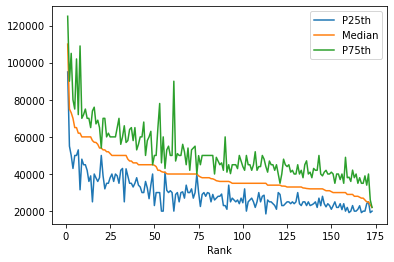

In [5]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

For statistics Fundamentals, refer <br> https://realpython.com/python-statistics/

From the plot, we make the following observations: <br>
1. The median earnings decreases with rank
2. For some majors, the difference between the 25th and 75th percentile income is large. So people with this major may earn significantly less or significantly more than the median income.
3. For some majors, the difference between the 25th and 75th percentile income is small. People with this major earn close to the median income

There are different kinds of plots: <br><br>
    <b>"area"</b> is for area plots. <br>
    <b>"bar"</b> is for vertical bar charts. <br>
    <b>"barh"</b> is for horizontal bar charts. <br>
    <b>"box"</b> is for box plots. <br>
    <b>"hexbin"</b> is for hexbin plots. <br>
    <b>"hist"</b> is for histograms. <br>
    <b>"kde"</b> is for kernel density estimate charts. <br>
    <b>"density"</b> is an alias for "kde". <br>
    <b>"line"</b> is for line graphs. <br>
    <b>"pie"</b> is for pie charts. <br>
    <b>"scatter"</b> is for scatter plots <br>

plot() takes a 'kind' parameter to plot a specific kind of a graph. If nothing is passed, line plot is created with index on the x-axis and all the numeric columns on the y-axis. An alternative for passing a string for the 'kind' parameter, the following functions can be called on the dataframe instead. <br><br>

    .area()
    .bar()
    .barh()
    .box()
    .hexbin()
    .hist()
    .kde()
    .density()
    .line()
    .pie()
    .scatter()

<b>Line plots</b> provide a good overview of the data. It helps to understand the general trend. Tells you where to zoom in. 

.plot() a wrapper around pyplot.plot() of matplotlib.<br>
For more details on matplotlib - https://realpython.com/lessons/python-plotting-matplotlib-overview/

<b>Histogram</b> is a good way of visualizing how values are distributed across a dataset. A histogram groups values into bins and gives a count of values falling in a particular bin.

<AxesSubplot:>

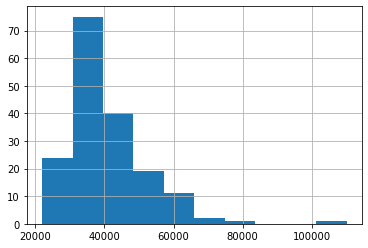

In [6]:
# Both series and dataframe objects in pandas have .plot() function
median = df["Median"]
median.hist()

A large number of majors provide a median income between 30000 to 40000. Also, there are a few majors which provide significantly higher income. 

<b>Normal Distribution</b> - symmetric bell shape with a peak in the middle

For more details on plotting histogram - https://realpython.com/python-histograms/

In the histogram, on the far right, we see a major having a bin to itself. This is an <b>outlier</b> which we can choose to examine further.

<AxesSubplot:xlabel='Major'>

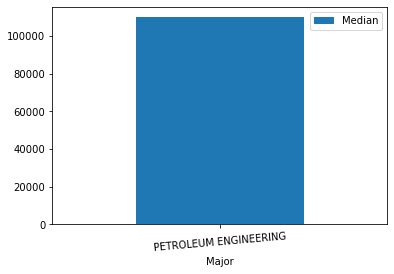

In [7]:
# see which major has median income more than 100000 that constitutes the outlier
df[df['Median']>100000].plot(x='Major', y='Median', kind='bar', rot=5)

<AxesSubplot:xlabel='Major'>

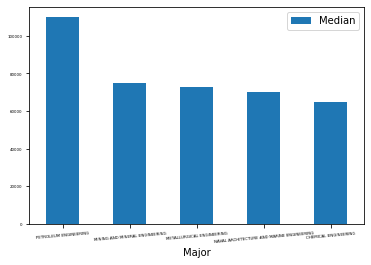

In [8]:
# get the top five majors with highest median incomes
df.sort_values(by='Median', ascending=False).head().plot(x='Major', y='Median', kind='bar', rot=5, fontsize=4)

We see that petroleum engineering is that one major which is an outlier with highest median income, at par even with the runner-up and all subsequent majors in the top-five list

We first have to examine if the outlier is valid data or is just erroneous data that creeped in during data collection. Either case, we can still choose to do away with the outliers when analysing data and drawing insights. 

To see if the outlier is valid data, we will look at the 25th and the 75th percentile for the top majors. 

<AxesSubplot:xlabel='Major'>

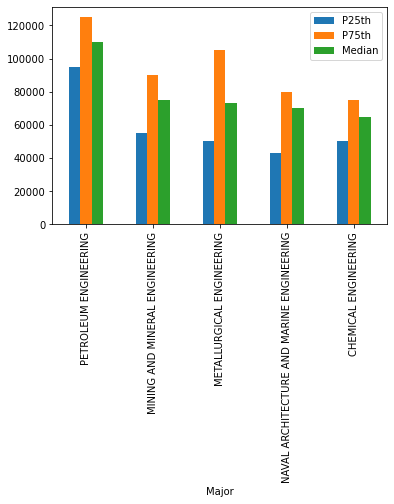

In [9]:
df.sort_values(by='Median', ascending=False).head().plot(x='Major', y=['P25th', 'P75th', 'Median'], kind='bar')

Looking at the 25th and 75th percentile, we know the petroleum engineering major is indeed the highest paying major. 

<b>Scatter plots</b> can be used to determine if there is any correlation between two columns in a data set.

In this case, we will create a scatter plot for columns median and unemployment rate to see if high paying majors also have high unemployment rate

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

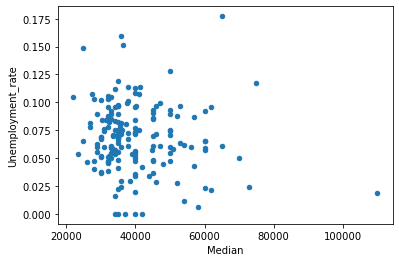

In [10]:
df.plot(x='Median', y='Unemployment_rate', kind='scatter')

There is no correlation between the major earnings and the unemployment rate. 

<b>NOTE:</b> correlation does not imply causation.

Measure correlation to validate hunches - https://realpython.com/numpy-scipy-pandas-correlation-python/

<b>Horizontal and vertical bar</b> plots are useful when we want to see the difference between categories.

Lets see how popular each of the major category is among students. 

<AxesSubplot:ylabel='Major_category'>

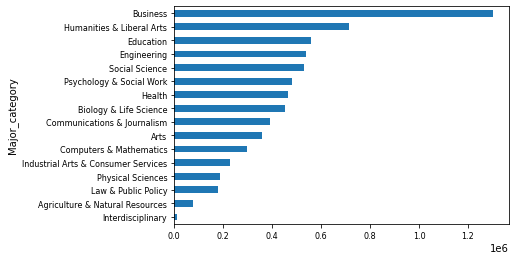

In [11]:
categories = df.groupby('Major_category')['Total'].sum().sort_values()
categories.plot(kind='barh', fontsize=8)

Business is the most popular category

<b>Pie charts</b> are good when we want to visualise the ratios of categories in the dataset. 
We will draw a pie chart for major categories. However, we have a few majors which make a very small portion of the dataset and would have very small overlapping slices.

<AxesSubplot:ylabel='Total'>

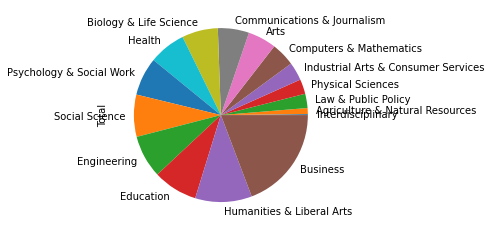

In [12]:
categories.plot(kind='pie')

Hence, we will combine the smaller majors into one category and plot the pie chart.

<AxesSubplot:>

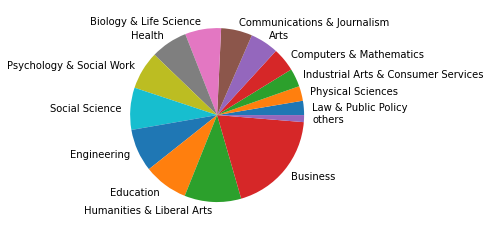

In [13]:
smaller_categories = categories[categories < 100000]
bigger_categories = categories[categories > 100000]

smaller_category_sum = pd.Series([smaller_categories.sum()], index=["others"])
bigger_categories = bigger_categories.append(smaller_category_sum)

bigger_categories.plot(kind="pie", label="")

<AxesSubplot:ylabel='Major'>

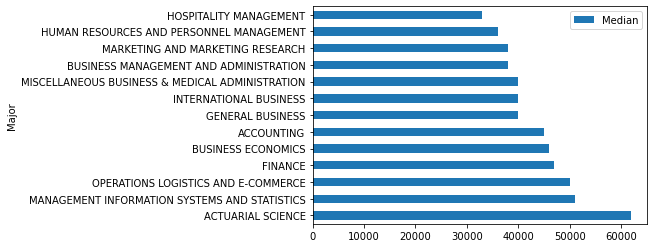

In [26]:
df[df['Major_category'] == 'Business'].plot(x='Major', y='Median', kind='barh')

<AxesSubplot:ylabel='Major'>

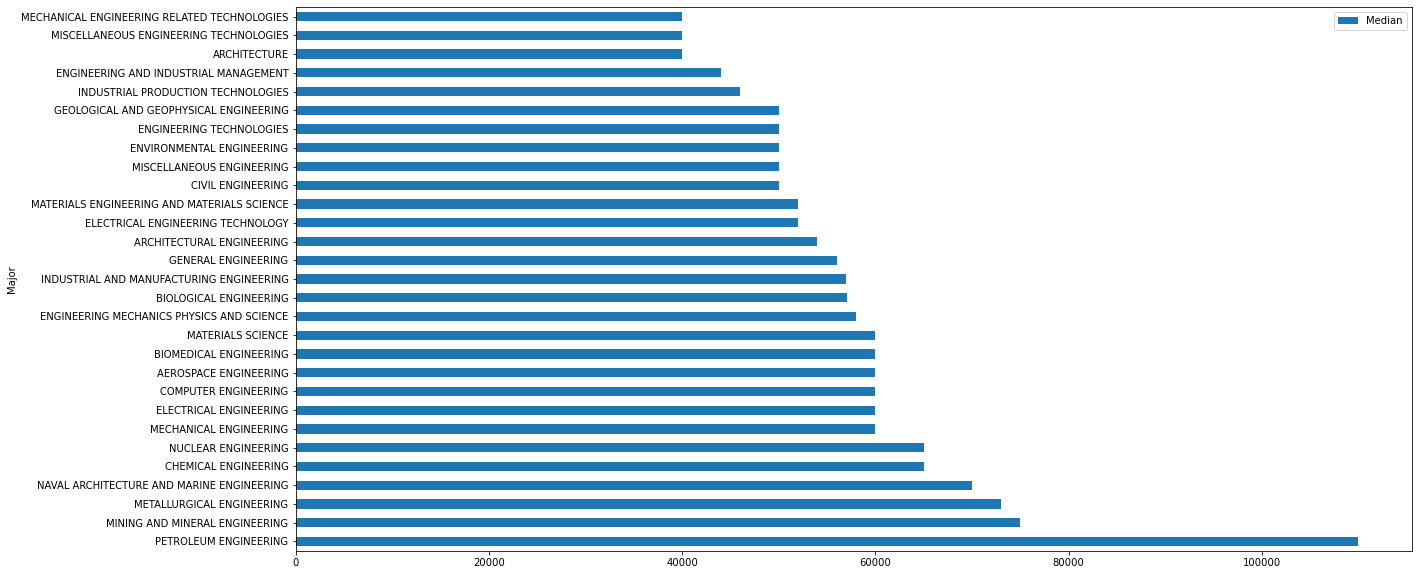

In [34]:
df[df['Major_category'] == 'Engineering'].plot(x='Major', y='Median', kind='barh', figsize=(20,10))

<AxesSubplot:ylabel='Frequency'>

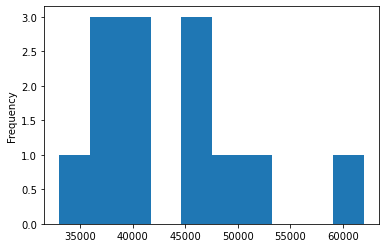

In [17]:
df[df["Major_category"] == "Business"]["Median"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

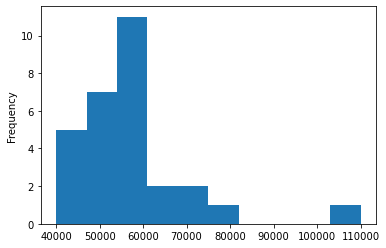

In [16]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")

Sometimes it helps to zoom in on categories to see if all the members in a category are similar. We see above that the majors in business do not have any drastic difference in their median pays unlike Engineering where Petroleum Engineering has a very high median pay.

<AxesSubplot:ylabel='Major'>

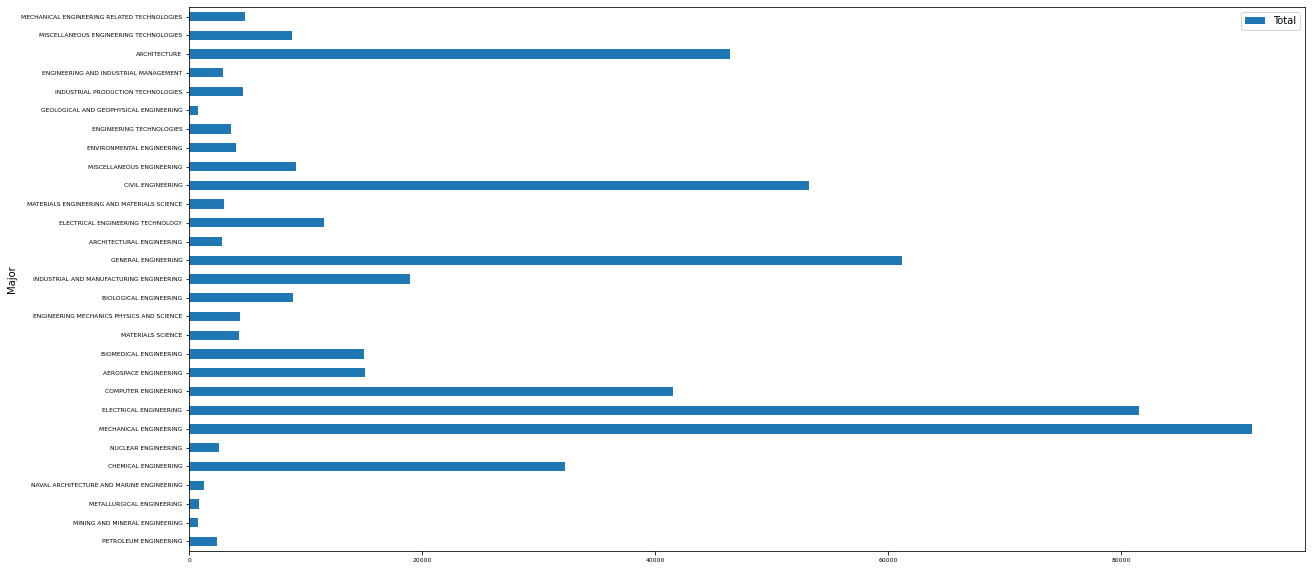

In [32]:
df[df['Major_category'] == 'Engineering'].plot(x='Major', y='Total', kind='barh', fontsize=6, figsize=(20, 10))

Among the engineering majors, mechanical engineering has the highest graduates, way higher than petroleum engineering having the highest median pay.